In [14]:
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt 
import fix_yahoo_finance as yf

[*********************100%***********************]  1 of 1 downloaded


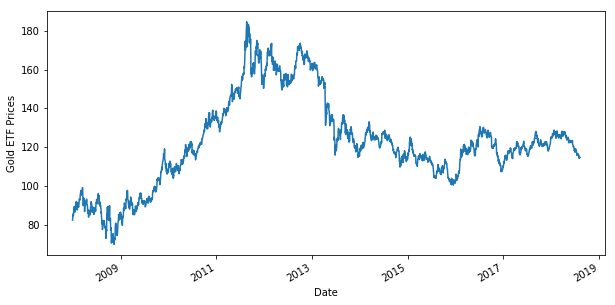

In [15]:
yf.pdr_override()
Df = pdr.get_data_yahoo('GLD','2008-01-01','2018-08-10')
#alternately, you can try : Df=yf.download('GLD',start='2008-01-01',end='2018-01-01')
Df=Df[['Close']] 
Df= Df.dropna() 
Df.Close.plot(figsize=(10,5)) 
plt.ylabel("Gold ETF Prices")
plt.show()

In [16]:
Df['S_3'] = Df['Close'].shift(1).rolling(window=3).mean() 
Df['S_9']= Df['Close'].shift(1).rolling(window=9).mean() 
Df= Df.dropna() 

In [17]:
X = Df[['S_3','S_9']] 
X.head()

y = Df['Close']
y.head()

Date
2008-01-14    89.540001
2008-01-15    87.989998
2008-01-16    86.699997
2008-01-17    86.500000
2008-01-18    87.419998
Name: Close, dtype: float64

In [18]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


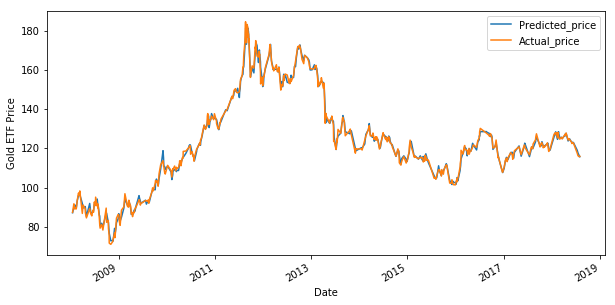

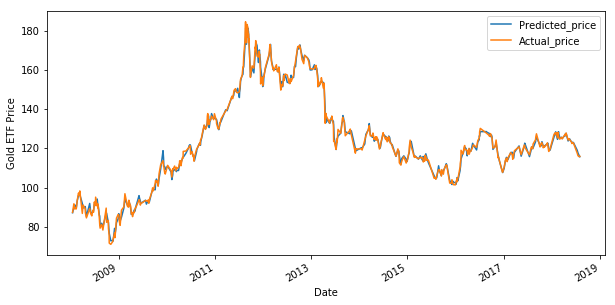

In [19]:
from sklearn.linear_model import LinearRegression 

linear = LinearRegression().fit(X_train,y_train) 
predicted_price = linear.predict(X_test)  
predicted_price = pd.DataFrame(predicted_price,index=y_test.index,columns = ['Price'])  
predicted_price.plot(figsize=(10,5))  
y_test.plot()  
plt.legend(['Predicted_price','Actual_price'])  
plt.ylabel("Gold ETF Price")  
plt.show()
predicted_price = linear.predict(X_test)  
predicted_price = pd.DataFrame(predicted_price,index=y_test.index,columns = ['Price'])  
predicted_price.plot(figsize=(10,5))  
y_test.plot()  
plt.legend(['Predicted_price','Actual_price'])  
plt.ylabel("Gold ETF Price")  
plt.show()

In [20]:
r2_score = linear.score(X_test,y_test)*100
float("{0:.2f}".format(r2_score))

99.47

In [ ]:
#Check r^2 score to see the accuracy limit for actual vs predicted.